In [1]:
bold = '\033[1m' 
end = '\033[0m'

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image 
import math
plt.style.use('seaborn-dark-palette')

In [2]:
table1_1 = pd.read_excel('Chapter1.xlsx', sheet_name='Table1.1')
table1_2 = pd.read_excel('Chapter1.xlsx', sheet_name='Table1.2')
table1_3 = pd.read_excel('Chapter1.xlsx', sheet_name='Table1.3')
table1_4 = pd.read_excel('Chapter1.xlsx', sheet_name='Table1.4')
table1_5 = pd.read_excel('Chapter1.xlsx', sheet_name='Table1.5')

In [3]:
print(table1_1.head())
print(table1_1.shape)

        YA       YB
0  74.0422  75.7523
1  75.2921  68.4104
2  75.6269  74.1911
3  75.9191  68.1020
4  77.2113  68.1002
(50, 2)


In [4]:
print(table1_2.head())
print(table1_2.shape)

   Inclusions
0           0
1           2
2           1
3           1
4           2
(60, 1)


In [5]:
print(table1_3.head())
print(table1_3.shape)

   interval_start  interval_stop  Frequency  Relative Frequency
0           71.51           72.5          1                0.02
1           72.51           73.5          2                0.04
2           73.51           74.5          9                0.18
3           74.51           75.5         17                0.34
4           75.51           76.5          7                0.14
(8, 4)


In [6]:
print(table1_4.head())
print(table1_4.shape)

   interval_start  interval_stop  Frequency  Relative Frequency
0           66.51           67.5          1                0.02
1           67.51           68.5          3                0.06
2           68.51           69.5          4                0.08
3           69.51           70.5          8                0.16
4           70.51           71.5          4                0.08
(13, 4)


In [7]:
print(table1_5.head())
print(table1_5.shape)

   x  Frequency  Relative Frequency
0  0         22               0.367
1  1         23               0.383
2  2         11               0.183
3  3          1               0.017
4  4          2               0.033
(7, 3)


# `EXERCISES`

# Exercise 1.1

The variance of a collection of $n$ data points, $y_1, y_2, \ldots, y_n$, is defined as:
<br> <br>
    $$ s^2 = \frac{\sum_{i=1}^n(y_i - \bar{y})^2}{n-1} $$ 
    
where $\bar{y}$ is the arithmetic average of the data set. From the yield data in Table 1.1, obtain the variances $s^2_A$ and $s^2_B$ for the $Y_A$ and $Y_B$ data sets, respectively.  Which  is greater, $s^2_A$ or $s^2_B$?

<table><tr><td><img src='Table1_1.png' width=200></td></tr></table>

In [8]:
n_yield = table1_1.shape[0]


# using formulas given in book
print(bold + "\n{} Results using formulas given in book: {}".format('–'*8, '–'*8) + end)
avg_ya = sum(table1_1.YA.values)/n_yield
avg_yb = sum(table1_1.YB.values)/n_yield
var_ya = sum((table1_1.YA.values - avg_ya)**2)/(n_yield-1)
var_yb = sum((table1_1.YB.values - avg_yb)**2)/(n_yield-1)

print("Average of YA = ", avg_ya)
print("Average of YB = ", avg_yb)
print("Variance of YA = ", var_ya)
print("Variance of YB = ", var_yb)



# using built-in functions
print(bold + "\n\n{} Results using built-in functions: {}".format('–'*8, '–'*8) + end)
avg_ya = table1_1.YA.mean()
avg_yb = table1_1.YB.mean()
var_ya = table1_1.YA.values.var(ddof=1)
var_yb = table1_1.YB.values.var(ddof=1)

print("Average of YA = ", avg_ya)
print("Average of YB = ", avg_yb)
print("Variance of YA = ", var_ya)
print("Variance of YB = ", var_yb)


variance = {
    'YA': var_ya,
    'YB': var_yb,
}
print("\n")
print("Variance of {} ({}) is greater than varinace of {} ({})".format(
    max(variance, key=variance.get),
    max(variance.values()),
    min(variance, key=variance.get),
    min(variance.values()),
))


–––––––– Results using formulas given in book: ––––––––
Average of YA =  75.518804
Average of YB =  72.47207200000001
Variance of YA =  2.049267960800001
Variance of YB =  7.640063316342855


–––––––– Results using built-in functions: ––––––––
Average of YA =  75.518804
Average of YB =  72.47207200000001
Variance of YA =  2.0492679608
Variance of YB =  7.640063316342858


Variance of YB (7.640063316342858) is greater than varinace of YA (2.0492679608)


# Exercise 1.2

Even though the data sets in Table 1.1 were not generated in pairs, obtain the 50 differences,
<br> <br>
    $$
    d_i = y_{A_i} - y_{B_i}\,; \,\,\, i = 1, 2, \ldots, 50,
    $$
<br>
for corresponding values of $Y_A$ and $Y_B$ as presented in this table.  Obtain a histogram of $d_i$ and compute the arithmetic average,
<br> <br>
    $$
    \bar{d} = \frac{1}{n}\sum_{i=1}^n d_i.
    $$

What do these results suggest about the possibility that $Y_A$ may be greater than $Y_B$? 

[-1.7101  6.8817  1.4358  7.8171  9.1111]

Average of d: 3.0467319999999996
Percentage of values greater than zero: 84.0%


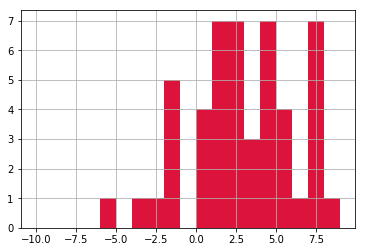

In [9]:
table1_1['d'] = table1_1.YA - table1_1.YB
print(table1_1.d.head().values)

table1_1.d.hist(
    bins=np.arange(-10, 10, 1),
    color='crimson'
)

avg_d = table1_1.d.mean()
print("\nAverage of d: {}".format(avg_d))

vals_more_than_zero = (len([x for x in table1_1.d if x>0])/n_yield)*100
print("Percentage of values greater than zero: {}%".format(vals_more_than_zero))

> #### `Observations:`

> From the histogram, we can see that most of the values (84% as we computed) are positive. 
The average value of d and the histogram suggest that YA is greater than YB by a value of 3.

# Exercise 1.3

A set of theoretical results state that, for $d_i$ and $\bar{d}$ (defined in Exercise 1.2), and variance $s^2$ (defined in Exercise 1.1), <br> <br>
$$
    \bar{d} = \bar{y}_A - \bar{y}_B
    $$ <br>
    $$
    s^2_d = s^2_A + s^2_B
    $$
    
Confirm these results specifically for the data in Table 1.1

In [10]:
var_d = sum((table1_1.d.values - avg_d)**2)/(n_yield-1)

print(bold + "\n{} Results using formulas defined in Exercises: {}".format('–'*8, '–'*8) + end)
print("Average value of d: ", avg_d)
print("Variance of d: ", var_d)


print(bold + "\n{} Results using theoretical statements: {}".format('–'*8, '–'*8) + end)
print("Average value of d: ", avg_ya - avg_yb)
print("Variance of d: ", var_ya + var_yb)



–––––––– Results using formulas defined in Exercises: ––––––––
Average value of d:  3.0467319999999996
Variance of d:  11.0220858634449

–––––––– Results using theoretical statements: ––––––––
Average value of d:  3.0467319999999916
Variance of d:  9.689331277142859


> #### `Observations:`
    
> As we can see, average value of d is indeed the difference of average values of YA and YB.
But, variance of d is `NOT` the sum of variances of YA and YB.

# Exercise 1.4

From the data in Table 1.2, obtain $s^2_x$, the variance of the inclusions.

<table><tr><td><img src='Table1_2.png' width=300></td></tr></table>

In [11]:
n_inclusions = table1_2.shape[0]
avg_inclusions = sum(table1_2.Inclusions.values)/n_inclusions
var_inclusions = sum((table1_2.Inclusions.values - avg_inclusions)**2)/(n_inclusions-1)

print("Average value of Inclusions: ", avg_inclusions)
print("Variance of Inclusions: ", var_inclusions)

Average value of Inclusions:  1.0166666666666666
Variance of Inclusions:  1.2031073446327696


# Exercise 1.5

The random variable, $X$, representing the number of inclusions, is purported to be a Poisson random variable .  If true, then the average, $\bar{x}$, and variance, $s^2_x$, are theoretically equal.  Compare the  values computed for these two quantities from the data set in  Table 1.2.  What do these results suggest about the possibility that $X$ may in fact be a Poisson random variable?

In [12]:
print("Average value of Inclusions: ", avg_inclusions)
print("Variance of Inclusions: ", var_inclusions)

Average value of Inclusions:  1.0166666666666666
Variance of Inclusions:  1.2031073446327696


> #### `Observations:`

> The average ($\bar{x}$ = 1.016666) and variance ($s_x^2$ = 1.203107) of $X$ are close but not equal. The results vaguely suggest that $X$ may be Poisson random variable.

# Exercise 1.6

Using a bin size of 0.75, obtain relative frequencies for $Y_A$ and $Y_B$ data and the corresponding histograms. Repeat this exercise for a bin size of 2.0. Compare these two sets of histograms with the corresponding histograms in Figs 12.8 and 1.2.

<table><tr><td><img src='Fig12_8.png' width=400></td></tr></table>

    frequency  interval_start  interval_stop  relative_frequency
0         1.0           72.00          72.75                0.02
1         2.0           72.75          73.50                0.04
2         7.0           73.50          74.25                0.14
3         9.0           74.25          75.00                0.18
4        12.0           75.00          75.75                0.24
5         5.0           75.75          76.50                0.10
6         7.0           76.50          77.25                0.14
7         5.0           77.25          78.00                0.10
8         1.0           78.00          78.75                0.02
9         1.0           78.75          79.50                0.02
10        0.0           79.50          80.25                0.00


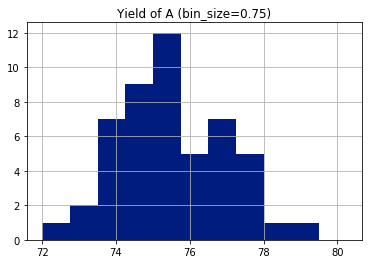



    frequency  interval_start  interval_stop  relative_frequency
0        7.0            72.0           74.0                0.14
1       28.0            74.0           76.0                0.56
2       13.0            76.0           78.0                0.26
3        2.0            78.0           80.0                0.04


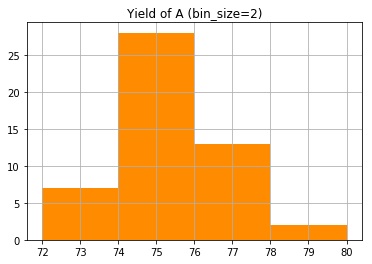

In [13]:
data_ya_75 = plt.hist(table1_1.YA, bins=np.arange(np.floor(min(table1_1.YA)), np.ceil(max(table1_1.YA))+1, 0.75))

freq_ya_75 = pd.DataFrame(data_ya_75[0], columns=['frequency'])
freq_ya_75['interval_start'] = data_ya_75[1][:-1]
freq_ya_75['interval_stop'] = data_ya_75[1][1:]
freq_ya_75['relative_frequency'] = freq_ya_75.frequency/sum(freq_ya_75.frequency)
print(freq_ya_75)

plt.grid(True)
plt.title('Yield of A (bin_size=0.75)')
plt.show()



data_ya_2 = plt.hist(
    table1_1.YA,
    bins=np.arange(np.floor(min(table1_1.YA)), np.ceil(max(table1_1.YA))+1, 2),
    color='darkorange'
)

freq_ya_2 = pd.DataFrame(data_ya_2[0], columns=['frequency'])
freq_ya_2['interval_start'] = data_ya_2[1][:-1]
freq_ya_2['interval_stop'] = data_ya_2[1][1:]
freq_ya_2['relative_frequency'] = freq_ya_2.frequency/sum(freq_ya_2.frequency)
print("\n\n", freq_ya_2)

plt.grid(True)
plt.title('Yield of A (bin_size=2)')
plt.show()

> #### `Observations:`

> 1. As the bin size increases, the information content of histogram decreases. The first histogram (bin_size: 0.75) is more informative than second (bin_size: 2).
> 2. When compared to Fig 12.8 (bin_size: 1), we see that first histogram (bin_size: 0.75) is similar to it. Both show the highest frequency at 75. Both show a sharp decrease in frequency as we move from 75 to 76. This frequency level is maintained till 78 and then it decreases further.
> 3. The second histogram (bin_size: 2) is broadly similar to Fig 12.8 (bin_size: 1) but is not as informative. It shows highest frequency in the range 74-76 and not precisely at 75. It shows decrease in frequency in the range 76-78 and further decrease afterwards.

Compare $Y_B$ data with histogram in Fig 1.2

<table><tr><td><img src='Fig1_2.png' width=400></td></tr></table>

    frequency  interval_start  interval_stop  relative_frequency
0         1.0           67.00          67.75                0.02
1         3.0           67.75          68.50                0.06
2         3.0           68.50          69.25                0.06
3         2.0           69.25          70.00                0.04
4         7.0           70.00          70.75                0.14
5         4.0           70.75          71.50                0.08
6         4.0           71.50          72.25                0.08
7         6.0           72.25          73.00                0.12
8         2.0           73.00          73.75                0.04
9         5.0           73.75          74.50                0.10
10        3.0           74.50          75.25                0.06
11        6.0           75.25          76.00                0.12
12        2.0           76.00          76.75                0.04
13        0.0           76.75          77.50                0.00
14        0.0           7

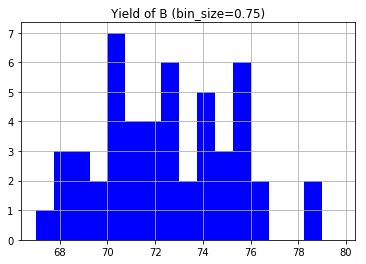



    frequency  interval_start  interval_stop  relative_frequency
0        5.0            67.0           69.0                0.10
1       12.0            69.0           71.0                0.24
2       13.0            71.0           73.0                0.26
3       10.0            73.0           75.0                0.20
4        8.0            75.0           77.0                0.16
5        2.0            77.0           79.0                0.04


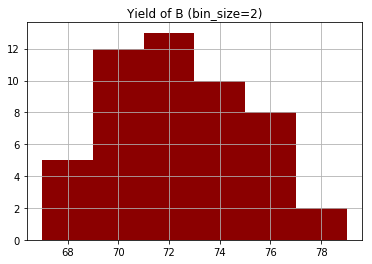

In [14]:
data_yb_75 = plt.hist(
    table1_1.YB,
    bins=np.arange(np.floor(min(table1_1.YB)), np.ceil(max(table1_1.YB))+1, 0.75),
    color='blue'
)

freq_yb_75 = pd.DataFrame(data_yb_75[0], columns=['frequency'])
freq_yb_75['interval_start'] = data_yb_75[1][:-1]
freq_yb_75['interval_stop'] = data_yb_75[1][1:]
freq_yb_75['relative_frequency'] = freq_yb_75.frequency/sum(freq_yb_75.frequency)
print(freq_yb_75)
plt.grid(True)
plt.title('Yield of B (bin_size=0.75)')
plt.show()

data_yb_2 = plt.hist(
    table1_1.YB,
    bins=np.arange(np.floor(min(table1_1.YB)), np.ceil(max(table1_1.YB))+1, 2),
    color='darkred'
)

freq_yb_2 = pd.DataFrame(data_yb_2[0], columns=['frequency'])
freq_yb_2['interval_start'] = data_yb_2[1][:-1]
freq_yb_2['interval_stop'] = data_yb_2[1][1:]
freq_yb_2['relative_frequency'] = freq_yb_2.frequency/sum(freq_yb_2.frequency)
print("\n\n", freq_yb_2)

plt.grid(True)
plt.title('Yield of B (bin_size=2)')
plt.show()

> #### `Observations:`

> 1. First histogram (bin_size: 0.75) is similar to Fig 1.2 (bin_size: 1). In both the histograms, the range 70-76 is highly populated and the frequency at 77 is zero. The regions outside this range are less populated. 
> 2. The second histogram (bin_size: 2) is not much like Fig 12.8 (bin_size: 1). It shows highest frequency in the range 69-77. The shape of histogram differs a lot from Fig 1.2

# Exercise 1.7

From the frequency distribution in Table 12.3 (same as table 1.3) and the  values computed for the average, $\bar{y}_A$, and variance, $s^2_A$ of the yield data set, $Y_A$, determine the percentage of the data contained in the interval $\bar{y}_A \pm 1.96 s_A$, where $s_A$ is the positive square root of the variance, $s^2_A$.

<table><tr><td><img src='Table1_3.png' width=300></td></tr></table>

In [15]:
print(table1_3)

std_ya = np.sqrt(var_ya)

range_start = avg_ya - 1.96*std_ya
range_stop = avg_ya + 1.96*std_ya


# Percentage of data within one standard deviation (by comparing values) 
data_1std = [x for x in table1_1.YA if x >= range_start and x <= range_stop]
data_1std = len(data_1std)/n_yield
print(bold + "\n\n{} Results from comparing actual data: {}".format('–'*8, '–'*8) + end)
print("\nThe required interval is: ({} - {})".format(range_start, range_stop))
print("\n{}% data lies within one standard deviation from mean.".format(data_1std*100))



# Percentage of data within one standard deviation (using frequency table intervals without adjustment) 
data_1std = table1_3[(table1_3.interval_start > range_start) & (table1_3.interval_stop < range_stop)]
data_1std = data_1std['Relative Frequency'].sum().round(2)
print(bold + "\n\n{} Results using frequency table intervals without adjustment: {}".format('–'*8, '–'*8) + end)
print("\nThe required interval is: ({} - {})".format(range_start, range_stop))
print("\n{}% data lies within one standard deviation from mean.".format(data_1std*100))



# Percentage of data within one standard deviation (using frequency table intervals with adjustment) 
bin_size = (table1_3.interval_stop[0] - table1_3.interval_start[0]).round()

# Adjusting ranges to include data points left (if any). Range_start is decreased and range_stop is increased by
# an amount bin_size/2 to make the range larger by 1 bin_size. Adjustment of half a bin_size will not add a 
# whole bin at any end, but will help include the bin which is already included half or more.
range_start -= bin_size/2
range_stop += bin_size/2

data_1std = table1_3[(table1_3.interval_start > range_start) & (table1_3.interval_stop < range_stop)]
data_1std = data_1std['Relative Frequency'].sum().round(2)
print(bold + "\n\n{} Results using frequency table intervals with adjustment: {}".format('–'*8, '–'*8) + end)
print("\nThe adjusted interval is: ({} - {})".format(range_start, range_stop))
print("\n{}% data lies within one standard deviation from mean.".format(data_1std*100))

   interval_start  interval_stop  Frequency  Relative Frequency
0           71.51           72.5          1                0.02
1           72.51           73.5          2                0.04
2           73.51           74.5          9                0.18
3           74.51           75.5         17                0.34
4           75.51           76.5          7                0.14
5           76.51           77.5          8                0.16
6           77.51           78.5          5                0.10
7           78.51           79.5          1                0.02


–––––––– Results from comparing actual data: ––––––––

The required interval is: (72.71301216912423 - 78.32459583087578)

96.0% data lies within one standard deviation from mean.


–––––––– Results using frequency table intervals without adjustment: ––––––––

The required interval is: (72.71301216912423 - 78.32459583087578)

82.0% data lies within one standard deviation from mean.


–––––––– Results using frequency tab

# Exercise 1.8

Repeat Exercise 1.7 for the $Y_B$ data in  Table 1.4. Determine the percentage of the data contained in the interval $\bar{y}_B \pm 1.96 s_B$.

<table><tr><td><img src='Table1_4.png' width=300></td></tr></table>

In [16]:
print(table1_4)

std_yb = np.sqrt(var_yb)

range_start = avg_yb - 1.96*std_yb
range_stop = avg_yb + 1.96*std_yb


# Percentage of data within one standard deviation (by comparing values) 
data_1std = [x for x in table1_1.YB if x >= range_start and x <= range_stop]
data_1std = len(data_1std)/n_yield
print(bold + "\n\n{} Results from comparing actual data: {}".format('–'*8, '–'*8) + end)
print("\nThe required interval is: ({} - {})".format(range_start, range_stop))
print("\n{}% data lies within one standard deviation from mean.".format(data_1std*100))



# Percentage of data within one standard deviation (using frequency table intervals without adjustment) 
data_1std = table1_4[(table1_4.interval_start > range_start) & (table1_4.interval_stop < range_stop)]
data_1std = data_1std['Relative Frequency'].sum().round(2)
print(bold + "\n\n{} Results using frequency table intervals without adjustment: {}".format('–'*8, '–'*8) + end)
print("\nThe required interval is: ({} - {})".format(range_start, range_stop))
print("\n{}% data lies within one standard deviation from mean.".format(data_1std*100))



# Percentage of data within one standard deviation (using frequency table intervals with adjustment) 
bin_size = (table1_4.interval_stop[0] - table1_4.interval_start[0]).round()

# Adjusting ranges to include data points left (if any). Range_start is decreased and range_stop is increased by
# an amount bin_size/2 to make the range larger by 1 bin_size. Adjustment of half a bin_size will not add a 
# whole bin at any end, but will help include the bin which is already included half or more.
range_start -= bin_size/2
range_stop += bin_size/2

data_1std = table1_4[(table1_4.interval_start > range_start) & (table1_4.interval_stop < range_stop)]
data_1std = data_1std['Relative Frequency'].sum().round(2)
print(bold + "\n\n{} Results using frequency table intervals with adjustment: {}".format('–'*8, '–'*8) + end)
print("\nThe adjusted interval is: ({} - {})".format(range_start, range_stop))
print("\n{}% data lies within one standard deviation from mean.".format(data_1std*100))

    interval_start  interval_stop  Frequency  Relative Frequency
0            66.51           67.5          1                0.02
1            67.51           68.5          3                0.06
2            68.51           69.5          4                0.08
3            69.51           70.5          8                0.16
4            70.51           71.5          4                0.08
5            71.51           72.5          7                0.14
6            72.51           73.5          4                0.08
7            73.51           74.5          6                0.12
8            74.51           75.5          5                0.10
9            75.51           76.5          6                0.12
10           76.51           77.5          0                0.00
11           77.51           78.5          2                0.04
12           78.51           79.5          0                0.00


–––––––– Results from comparing actual data: ––––––––

The required interval is: (67.054

> #### `Observations/Note:`

> Turns out that the adjustment method I chose was not good enough to capture all the data points. It missed some data points by a margin of 0.06. The adjustment method wasn't too bad but isn't reliable as well. If only the frequency table is available, better ways need to used (I didn't find any method to do it, so not sure what the better ways are).

# Exercise 1.9

From Table 1.5 determine the value of $x$ such that only 5% of the data exceeds this value.

<table><tr><td><img src='Table1_5.png' width=300></td></tr></table>

In [17]:
print(table1_5)

# Only 5% data exceeding a value => 95% of data is less than that value
percentile = 1 - 0.05


# If only frequency table is available
data = []
for _, row in table1_5.iterrows():
    data.extend([int(row.x)]*int(row.Frequency))

#since data is already sorted, no sorting is required
l = len(data) - 1  # subtracting 1 for zero-based indexing
print(bold + "\n\n{} Results using only frequency table: {}".format('–'*8, '–'*8) + end)
print("The value such that only 5% data exceeds it is: {}".format(data[int(l*percentile)]))



# Since we have the data available to us in table1.2, we can skip generating 'data' list
# We can directly take data from the table1.2
# Note: As we can see from table1.2, this time the data needs sorting
data = sorted(table1_2.Inclusions.values)

l = len(data) - 1  # subtracting 1 for zero-based indexing
print(bold + "\n\n{} Results using data points: {}".format('–'*8, '–'*8) + end)
print("The value such that only 5% data exceeds it is: {}".format(data[int(l*percentile)]))


# Using built-in functions for percentiles/Quantiles
print(bold + "\n\n{} Results using built-in functions: {}".format('–'*8, '–'*8) + end)
print("Using Pandas.Series.quantile():")
print("The value such that only 5% data exceeds it is: {}".format(table1_2.Inclusions.quantile(0.95)))

print("\nUsing Numpy.percentile():")
print("The value such that only 5% data exceeds it is: {}".format(np.percentile(data, 95)))

   x  Frequency  Relative Frequency
0  0         22               0.367
1  1         23               0.383
2  2         11               0.183
3  3          1               0.017
4  4          2               0.033
5  5          1               0.017
6  6          0               0.000


–––––––– Results using only frequency table: ––––––––
The value such that only 5% data exceeds it is: 3


–––––––– Results using data points: ––––––––
The value such that only 5% data exceeds it is: 3


–––––––– Results using built-in functions: ––––––––
Using Pandas.Series.quantile():
The value such that only 5% data exceeds it is: 3.049999999999997

Using Numpy.percentile():
The value such that only 5% data exceeds it is: 3.049999999999997


> #### `Observations:`

> Since the built-in methods use interpolation (mentioned ion documentation), the results are different from those with manual computations.

# Exercise 1.10

Using $\mu=75.52$ and $\sigma= 1.43$, compute theoretical values of the function in Eq 4.155 (also Eq 1.3) given below <br><br>
$$
f(y|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(y-\mu)^2}{2
    \sigma^2}}; - \infty < y < \infty
$$

at the center points of the frequency groups for the $Y_A$ data in Table 1.3; i.e., for $y= 72, 73, \ldots, 79$.  Compare these theoretical values with the corresponding relative frequency values.

In [18]:
def function_of_y(y, mu=75.52, sigma=1.43):
    value = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-((y-mu)**2)/(2*(sigma**2)))
    return value

center_points = (table1_3.interval_start + table1_3.interval_stop)/2
center_points = center_points.values.round()

theoretical_values = []
for centre_pt in center_points:
    theoretical_values.append(function_of_y(centre_pt))
    
comparision_df = pd.DataFrame(
    [theoretical_values, table1_3['Relative Frequency'].values.tolist()],
    columns=center_points,
    index=['Theoretical Values', 'Relative Frequency']
)

# diff = Relative freq - Theoretical Vals
difference = pd.Series(comparision_df.iloc[1][:] - comparision_df.iloc[0][:])
difference.name = 'Difference'
comparision_df = comparision_df.append(difference)

difference = (difference/comparision_df.iloc[0][:])*100 # (diff/Theoretical_vals)*100
difference.name = 'Difference Percentage'
comparision_df = comparision_df.append(difference)

print("\nAvg Difference Percentage: ", abs(comparision_df.iloc[3][:].values).mean())
comparision_df.round(5)


Avg Difference Percentage:  34.123011014662225


,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0
Theoretical Values,0.01348,0.05905,0.15857,0.26113,0.2637,0.16330,0.06201,0.01444
Relative Frequency,0.02000,0.04000,0.18000,0.34000,0.1400,0.16000,0.10000,0.02000
Difference,0.00652,-0.01905,0.02143,0.07887,-0.1237,-0.00330,0.03799,0.00556
Difference Percentage,48.31612,-32.26193,13.51129,30.20228,-46.9091,-2.01857,61.26305,38.50175


> #### `Observations:`

> The model results are close to some values (for 77, 74) and way off for others. The average difference percentage is too high (34%). Such a model is not very useful in real world.

# Exercise 1.11

Repeat Exercise 1.10 for $Y_B$ data and Table 1.4

In [19]:
def function_of_y(y, mu=75.52, sigma=1.43):
    value = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-((y-mu)**2)/(2*(sigma**2)))
    return value

center_points = (table1_4.interval_start + table1_4.interval_stop)/2
center_points = center_points.values.round()

theoretical_values = []
for centre_pt in center_points:
    theoretical_values.append(function_of_y(centre_pt))
    
comparision_df = pd.DataFrame(
    [theoretical_values, table1_4['Relative Frequency'].values.tolist()],
    columns=center_points,
    index=['Theoretical Values', 'Relative Frequency']
)

# diff = Relative freq - Theoretical Vals
difference = pd.Series(comparision_df.iloc[1][:] - comparision_df.iloc[0][:])
difference.name = 'Difference'
comparision_df = comparision_df.append(difference)

difference = (difference/comparision_df.iloc[0][:])*100 # (diff/Theoretical_vals)*100
difference.name = 'Difference Percentage'
comparision_df = comparision_df.append(difference)

print("\nAvg Difference Percentage: ", abs(comparision_df.iloc[3][:].values).mean())
comparision_df.round(4)


Avg Difference Percentage:  29928761.803127747


,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0
Theoretical Values,0.000000e+00,0.000000e+00,0.0000,0.0002,0.0019,0.0135,0.0591,0.1586,0.2611,0.2637,0.1633,0.0620,0.0144
Relative Frequency,2.000000e-02,6.000000e-02,0.0800,0.1600,0.0800,0.1400,0.0800,0.1200,0.1000,0.1200,0.0000,0.0400,0.0000
Difference,2.000000e-02,6.000000e-02,0.0800,0.1598,0.0781,0.1265,0.0209,-0.0386,-0.1611,-0.1437,-0.1633,-0.0220,-0.0144
Difference Percentage,3.662739e+08,2.175921e+07,936773.5749,98570.5271,4136.5588,938.2129,35.4761,-24.3258,-61.7052,-54.4935,-100.0000,-35.4948,-100.0000


> #### `Observations:`

> This results are horrible! Even the closest value is off by 24% and the average difference percentage is way too large!

# Exercise 1.12

Using $\lambda = 1.02$, compute theoretical values of the function $f(x|\lambda)$ in Eq 4.40 (also Eq 1.4) given below <br> <br>
$$
f(x|\lambda) = \frac{e^{-\lambda}\lambda^x}{x!}; x= 0, 1, 2,\ldots
$$

at $x= 0, 1, 2, \ldots 6$ and compare with the corresponding relative frequency values in Table 1.5

In [20]:
def function_of_x(x, lmbda=1.02):
    value = (np.exp(-lmbda)*(lmbda**x))/math.factorial(x)
    return value

center_points = list(range(0,7))

theoretical_values = []
for centre_pt in center_points:
    theoretical_values.append(function_of_x(centre_pt))
    
comparision_df = pd.DataFrame(
    [theoretical_values, table1_5['Relative Frequency'].values.tolist()],
    columns=center_points,
    index=['theoretical_values', 'Relative Frequency']
)

# diff = Relative freq - Theoretical Vals
difference = pd.Series(comparision_df.iloc[1][:] - comparision_df.iloc[0][:])
difference.name = 'Difference'
comparision_df = comparision_df.append(difference)

difference = (difference/comparision_df.iloc[0][:])*100 # (diff/Theoretical_vals)*100
difference.name = 'Difference Percentage'
comparision_df = comparision_df.append(difference)

print("\nAvg Difference Percentage: ", abs(comparision_df.iloc[3][:].values).mean())
comparision_df.round(4)


Avg Difference Percentage:  99.57223281011709


,0,1,2,3,4,5,6
theoretical_values,0.3606,0.3678,0.1876,0.0638,0.0163,0.0033,0.0006
Relative Frequency,0.3670,0.3830,0.1830,0.0170,0.0330,0.0170,0.0000
Difference,0.0064,0.0152,-0.0046,-0.0468,0.0167,0.0137,-0.0006
Difference Percentage,1.7762,4.1307,-2.4424,-73.3449,102.9107,412.4007,-100.0000


> #### `Observations:`

> The model results are good for half of the values (0, 1 and 2). The others might improve if we have more data points. This model looks pretty reasonable.